In [118]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':14}) 
import numpy as np

xrd_file_asdep = 'E:/PCM/XRD/Si-GSSe400nm-SiO2_capped_asdep_GI-3deg_5-50deg_0.05deg_1sec_DivSlit0.2mm_BigSoller.txt'
xrd_file_heated = 'E:/PCM/XRD/Si-GSSe400nm-SiO2_capped_HT_GI-3deg_5-50deg_0.05deg_1sec_DivSlit0.2mm_BigSoller.txt'

In [119]:
with open(xrd_file_asdep, 'r') as f:
    asdep_data = f.readlines()

with open(xrd_file_heated, 'r') as f:
    heated_data = f.readlines()
    
    
asdep_data = pd.DataFrame(asdep_data[302:])
heated_data = pd.DataFrame(heated_data[302:])

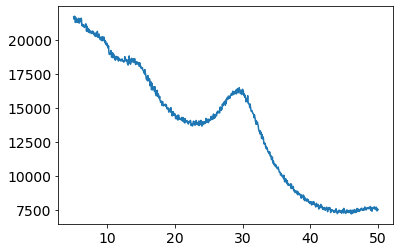

In [120]:
asdep_data[0][1].split(',')[0]
asdep_data[0][1].split(',')[1]

x_asdep = []
y_asdep = []

for i in (asdep_data[0][1:]):
    x_asdep.append(float(i.split(',')[0]))
    y_asdep.append(float(i.split(',')[1]))


plt.plot(x_asdep[1:], y_asdep[1:])
plt.show()
    

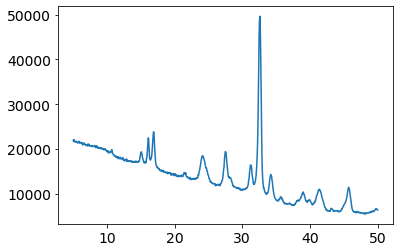

In [121]:
heated_data[0][1].split(',')[0]
heated_data[0][1].split(',')[1]

x_heated = []
y_heated = []

for i in (heated_data[0][1:]):
    x_heated.append(float(i.split(',')[0]))
    y_heated.append(float(i.split(',')[1]))


plt.plot(x_heated[1:], y_heated[1:])
plt.show()

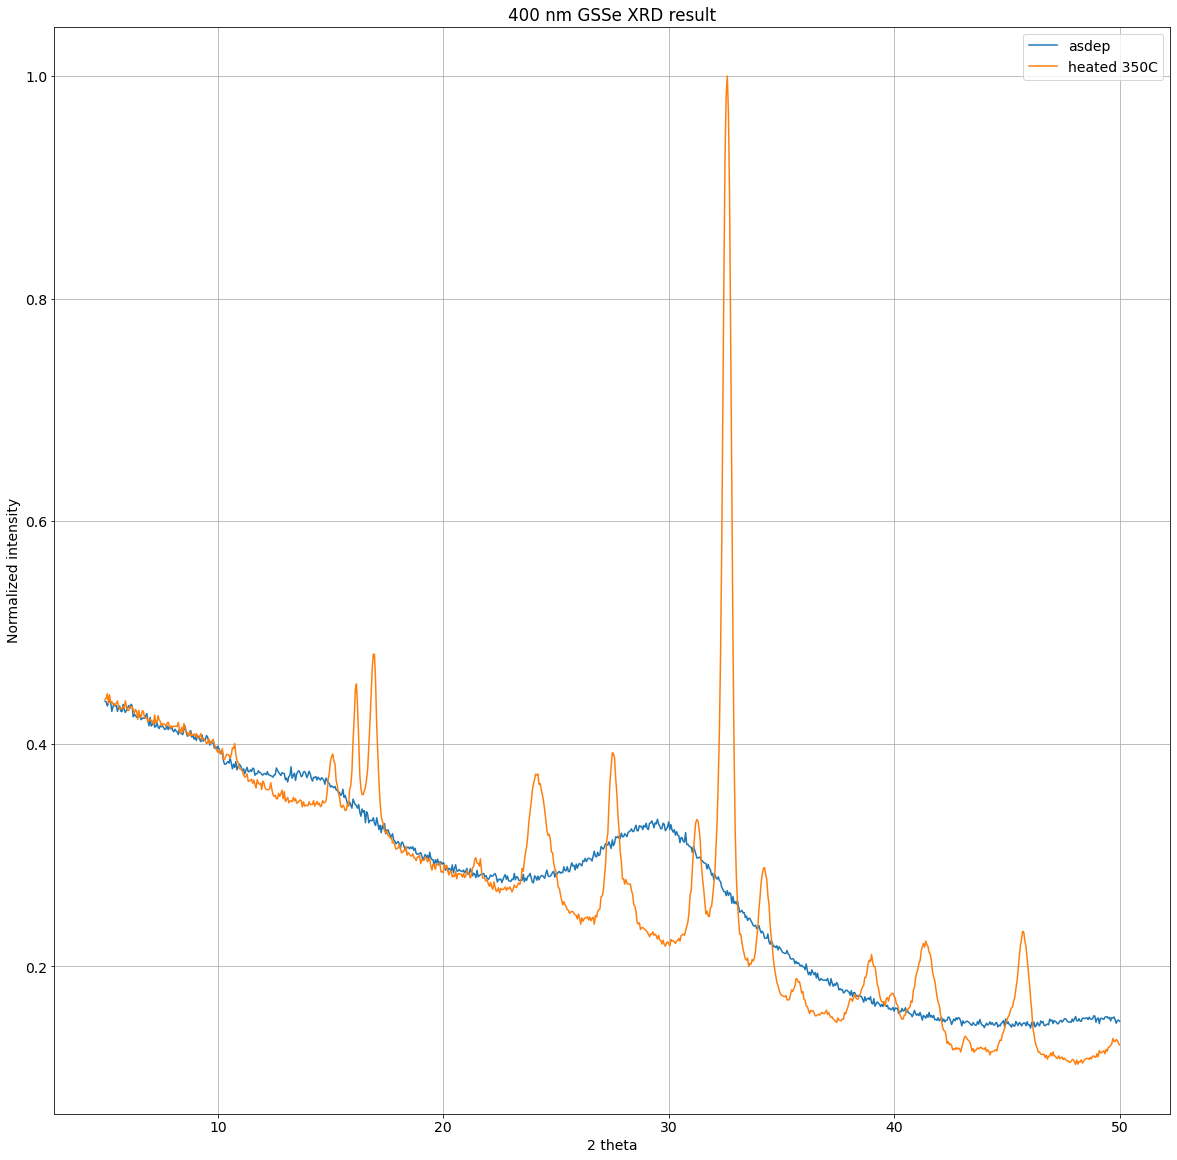

In [129]:
plt.figure(figsize = (20, 20))
plt.plot(x_asdep, y_asdep / np.max(y_heated), x_heated, y_heated / np.max(y_heated))
plt.xlabel('2 theta')
plt.ylabel('Normalized intensity')
plt.legend(['asdep', 'heated 350C'])
plt.title('400 nm GSSe XRD result')
plt.grid()
plt.savefig('XRD_plot.png')

In [125]:
for i in range(len(x_heated)):
    if y_heated[i] == np.max(y_heated):
        print(x_heated[i])
        break

32.6001


<Figure size 432x288 with 0 Axes>